In [1]:
from utility import load_test_results, architecture_stats, sample_image, plot_hyper

from NeuralNetwork import NeuralNetwork, torch

In [2]:
classifiers_dict, all_results = load_test_results("LeNet5")

In [3]:
classifiers_dict

{0: 'LeNet5'}

In [4]:
all_results.head(10)

,test_id,architecture_id,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
0,0,0,AMSGrad,0.0005,32,5,0.00,0.909927,0.057194,52.636681
1,1,0,AMSGrad,0.0005,32,5,0.25,0.903514,0.058538,64.383646
2,2,0,AMSGrad,0.0005,32,5,0.50,0.915505,0.057991,35.618378
3,3,0,AMSGrad,0.0005,32,5,0.75,0.928751,0.058305,87.831853
4,4,0,AMSGrad,0.0005,32,10,0.00,0.949108,0.057710,55.958495
5,5,0,AMSGrad,0.0005,32,10,0.25,0.933491,0.057468,65.432281
6,6,0,AMSGrad,0.0005,32,10,0.50,0.956916,0.058936,77.605795
7,7,0,AMSGrad,0.0005,32,10,0.75,0.954824,0.057233,91.636223
8,8,0,AMSGrad,0.0005,32,15,0.00,0.960541,0.058538,53.828811
9,9,0,AMSGrad,0.0005,32,15,0.25,0.954406,0.057286,68.768257


# Architectures analysis

In [5]:
all_results.sort_values(by=['test_accuracies'], ascending=True).head(10)

,test_id,architecture_id,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
1,1,0,AMSGrad,0.0005,32,5,0.25,0.903514,0.058538,64.383646
0,0,0,AMSGrad,0.0005,32,5,0.00,0.909927,0.057194,52.636681
2,2,0,AMSGrad,0.0005,32,5,0.50,0.915505,0.057991,35.618378
3,3,0,AMSGrad,0.0005,32,5,0.75,0.928751,0.058305,87.831853
5,5,0,AMSGrad,0.0005,32,10,0.25,0.933491,0.057468,65.432281
21,21,0,AMSGrad,0.0005,64,10,0.25,0.939208,0.039112,4.539042
46,46,0,AMSGrad,0.0005,128,20,0.50,0.940602,0.032367,7.132962
14,14,0,AMSGrad,0.0005,32,20,0.50,0.941299,0.057308,18.959954
51,51,0,AMSGrad,0.0005,256,5,0.75,0.943391,0.029737,34.857853
27,27,0,AMSGrad,0.0005,64,15,0.75,0.944367,0.038771,50.658747


In [6]:
architecture_stats(all_results, classifiers_dict, 0)

stats for architecture: LeNet5 (id: 0)

mean accuracy: 0.9706 with SD: 0.0096

best accuracy: 0.9831
test_id                        384
optimizer                     ADAM
lr                          0.0005
batch_size                     512
patience                         5
data_augmentation_perc         0.0
test_times                0.027205
train_times               1.687791
Name: 384, dtype: object 

worst accuracy: 0.9035
test_id                           1
optimizer                   AMSGrad
lr                           0.0005
batch_size                       32
patience                          5
data_augmentation_perc         0.25
test_times                 0.058538
train_times               64.383646
Name: 1, dtype: object 






# Hyperparameters analysis

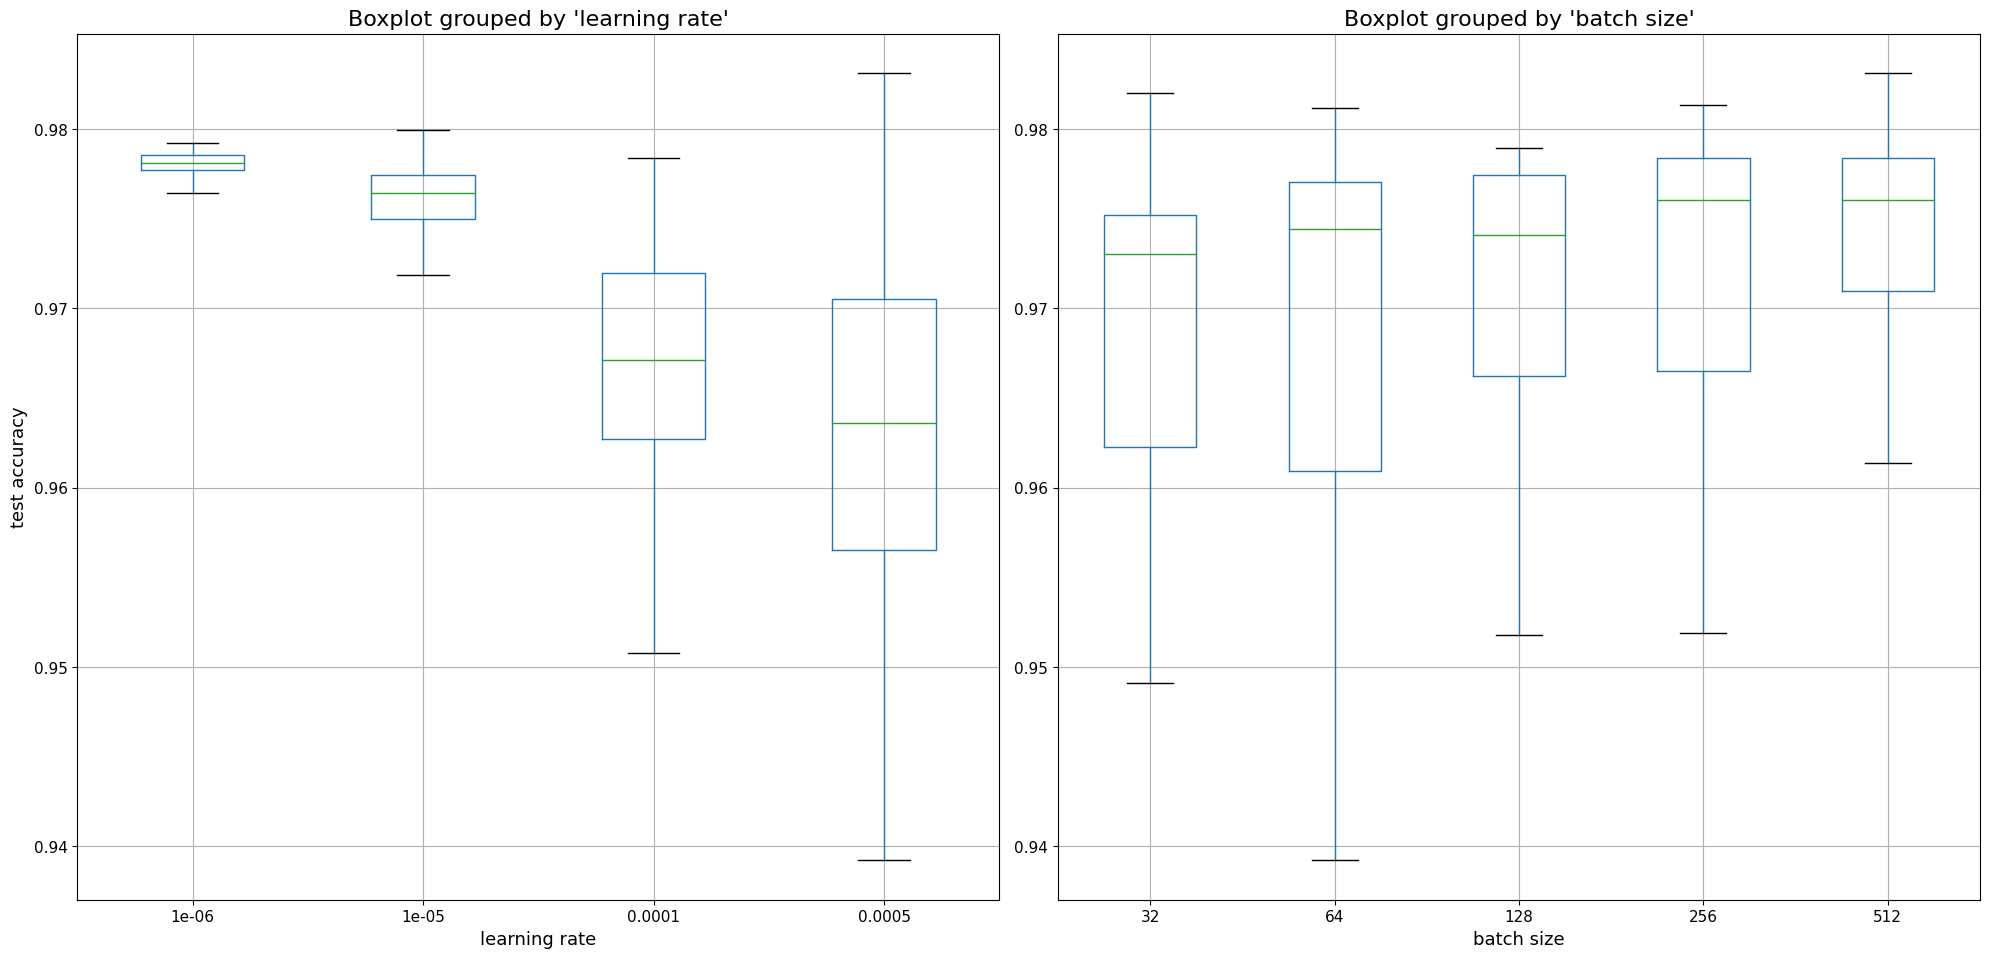

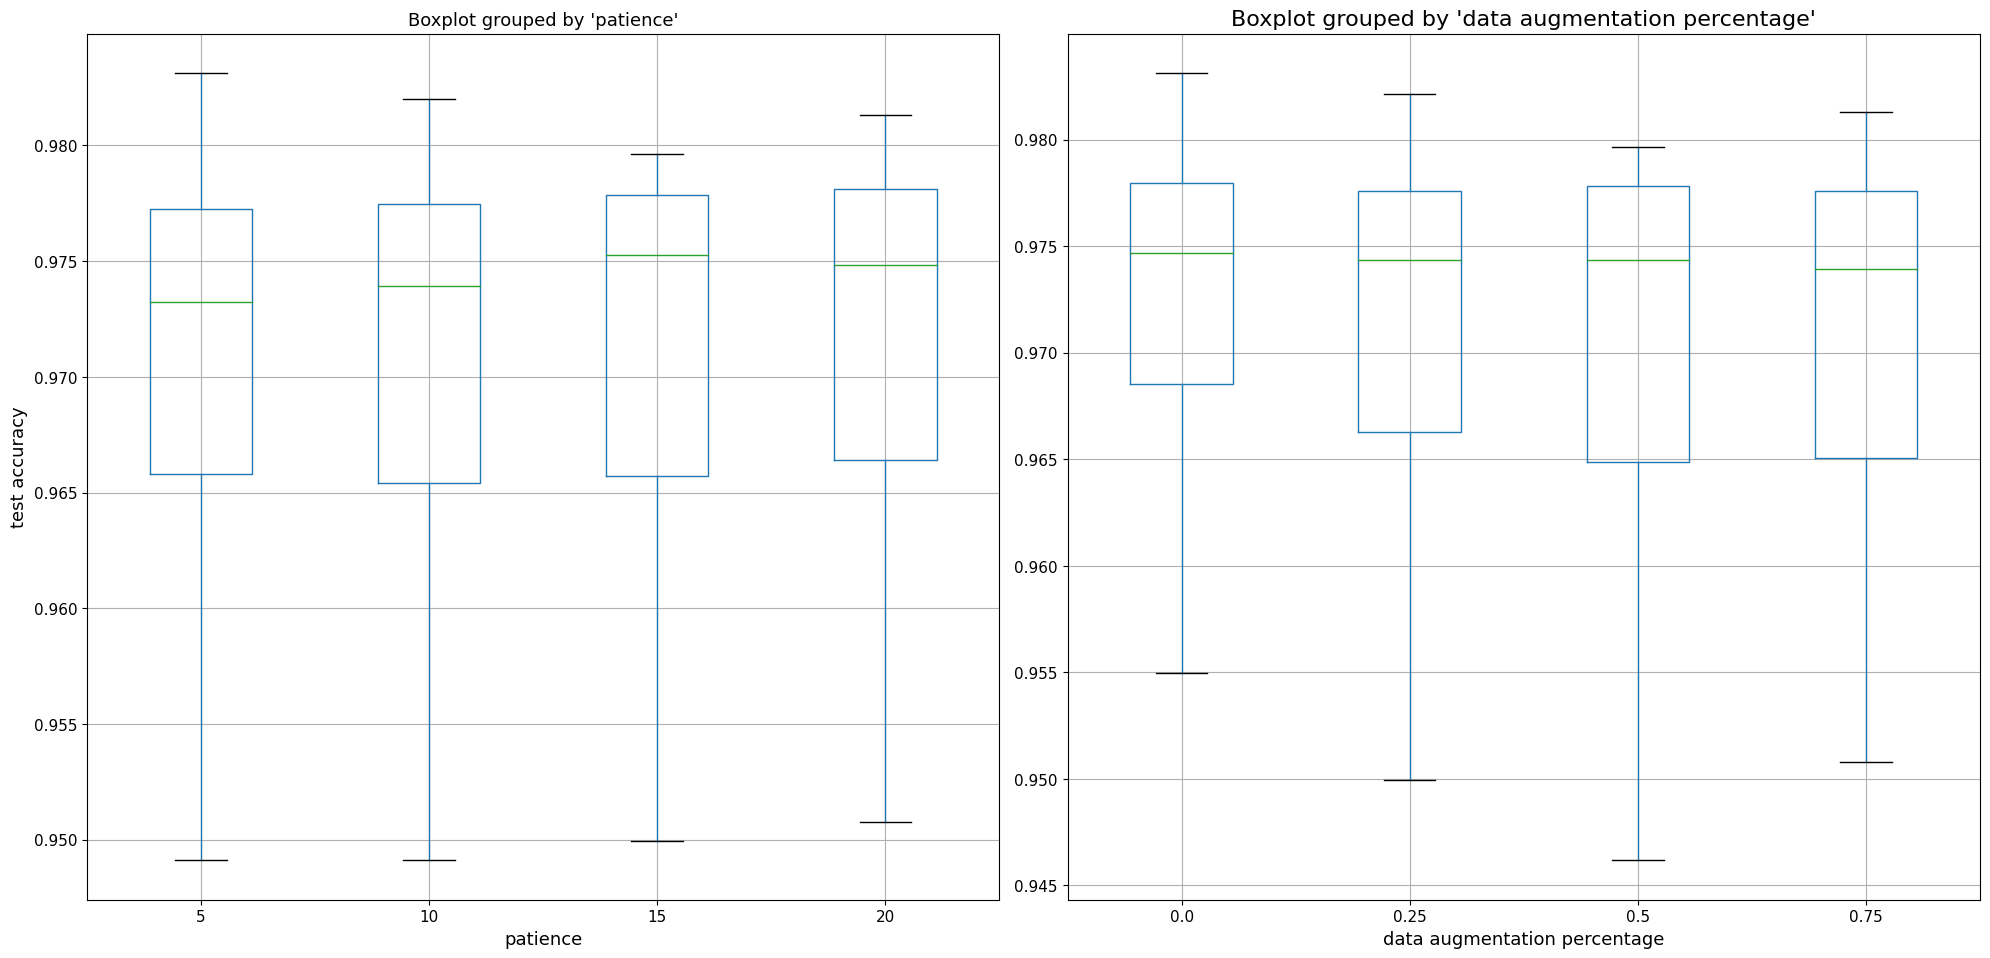

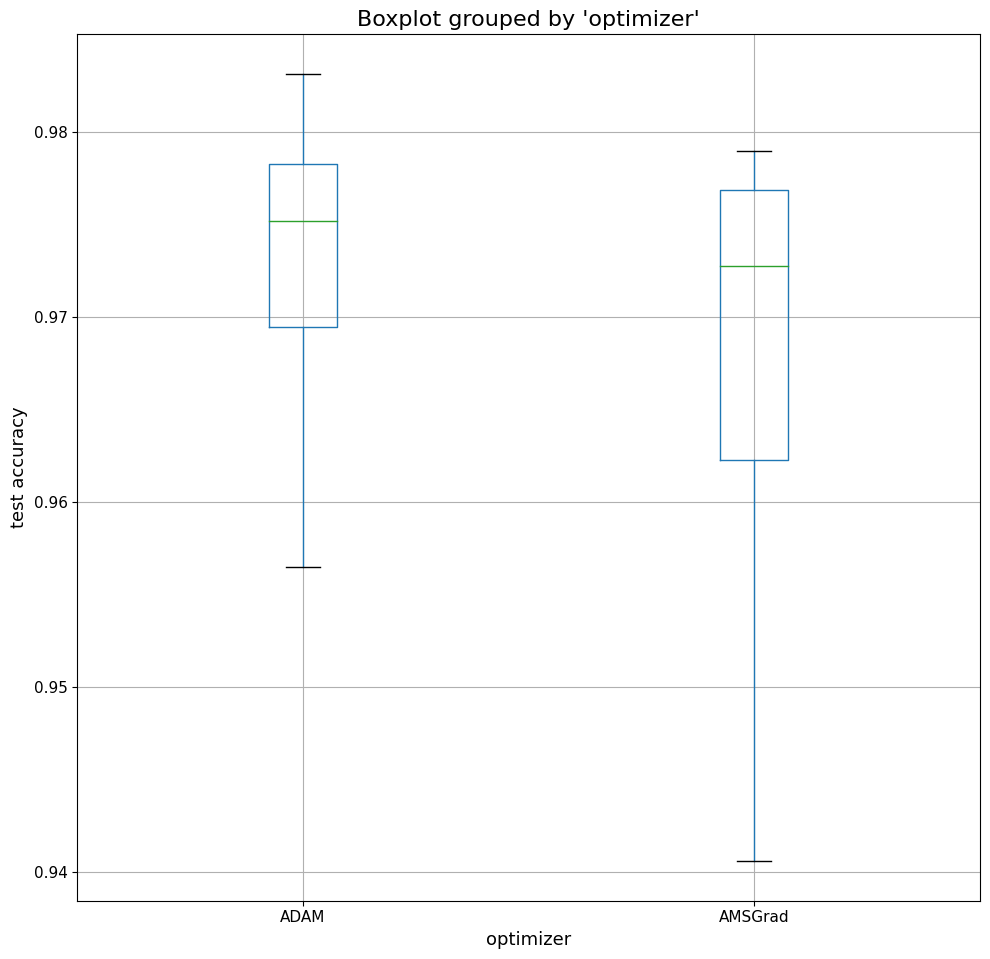

In [7]:
plot_hyper(all_results, isLeNet5=True, remove_outliers=True)

# Best model

In [8]:
all_results.sort_values(by=['test_accuracies'], ascending=False).head(10)

,test_id,architecture_id,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
384,384,0,ADAM,0.00050,512,5,0.00,0.983129,0.027205,1.687791
385,385,0,ADAM,0.00050,512,5,0.25,0.982153,0.066522,2.088120
324,324,0,ADAM,0.00050,32,10,0.00,0.982013,0.056795,25.850345
383,383,0,ADAM,0.00050,256,20,0.75,0.981316,0.029505,7.475505
348,348,0,ADAM,0.00050,64,20,0.00,0.981177,0.038387,6.510842
543,543,0,ADAM,0.00001,256,20,0.75,0.979922,0.029531,7.240790
544,544,0,ADAM,0.00001,512,5,0.00,0.979782,0.027203,1.139996
542,542,0,ADAM,0.00001,256,20,0.50,0.979643,0.029491,6.255569
552,552,0,ADAM,0.00001,512,15,0.00,0.979643,0.070143,3.026459
545,545,0,ADAM,0.00001,512,5,0.25,0.979504,0.027333,1.423488


Loaded model: LeNet5_test_384


Architecture:
name: LeNet5
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 6, 14, 14]           --
|    └─Conv2d: 2-1                       [-1, 6, 28, 28]           156
|    └─BatchNorm2d: 2-2                  [-1, 6, 28, 28]           12
|    └─ReLU: 2-3                         [-1, 6, 28, 28]           --
|    └─MaxPool2d: 2-4                    [-1, 6, 14, 14]           --
├─Sequential: 1-2                        [-1, 16, 5, 5]            --
|    └─Conv2d: 2-5                       [-1, 16, 10, 10]          2,416
|    └─BatchNorm2d: 2-6                  [-1, 16, 10, 10]          32
|    └─ReLU: 2-7                         [-1, 16, 10, 10]          --
|    └─MaxPool2d: 2-8                    [-1, 16, 5, 5]            --
├─Linear: 1-3                            [-1, 120]                 48,120
├─ReLU: 1-4                              [-1, 120]                 --
├─Linear: 1-5     

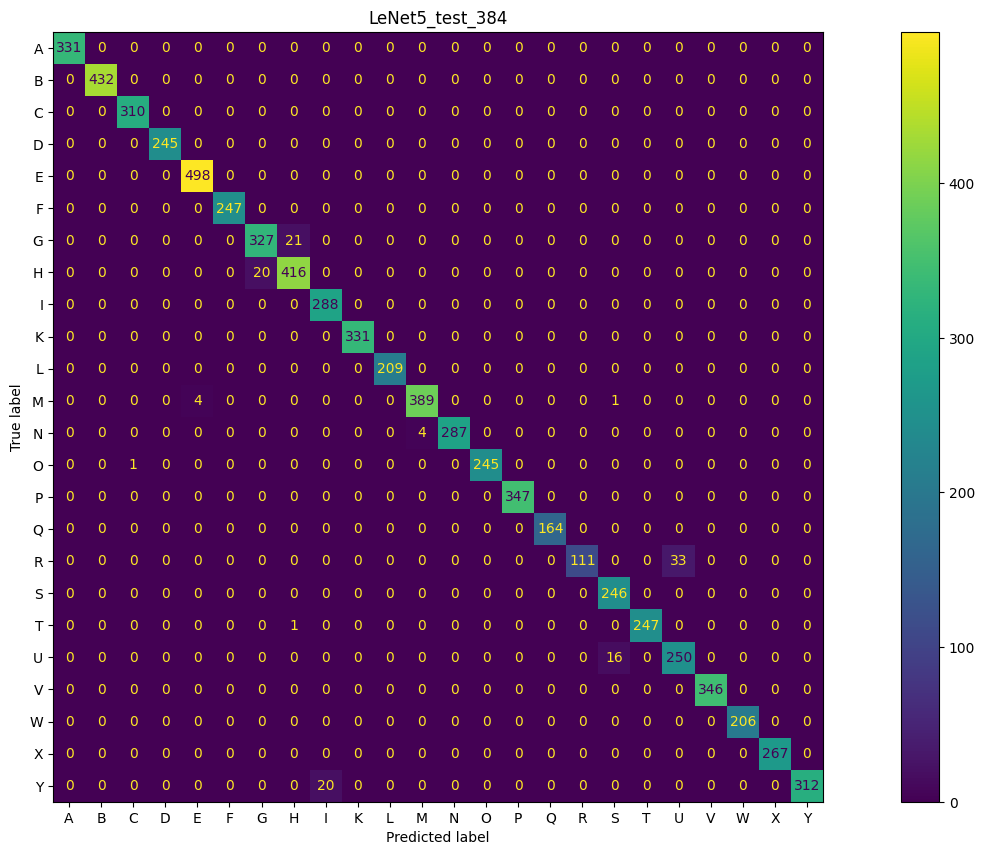

0.9831288343558282


In [9]:
best_model = NeuralNetwork.load_NN(all_results.iloc[384], classifiers_dict, torch.device("cuda"), (32,32))
best_model.plot_confusion_matrix()

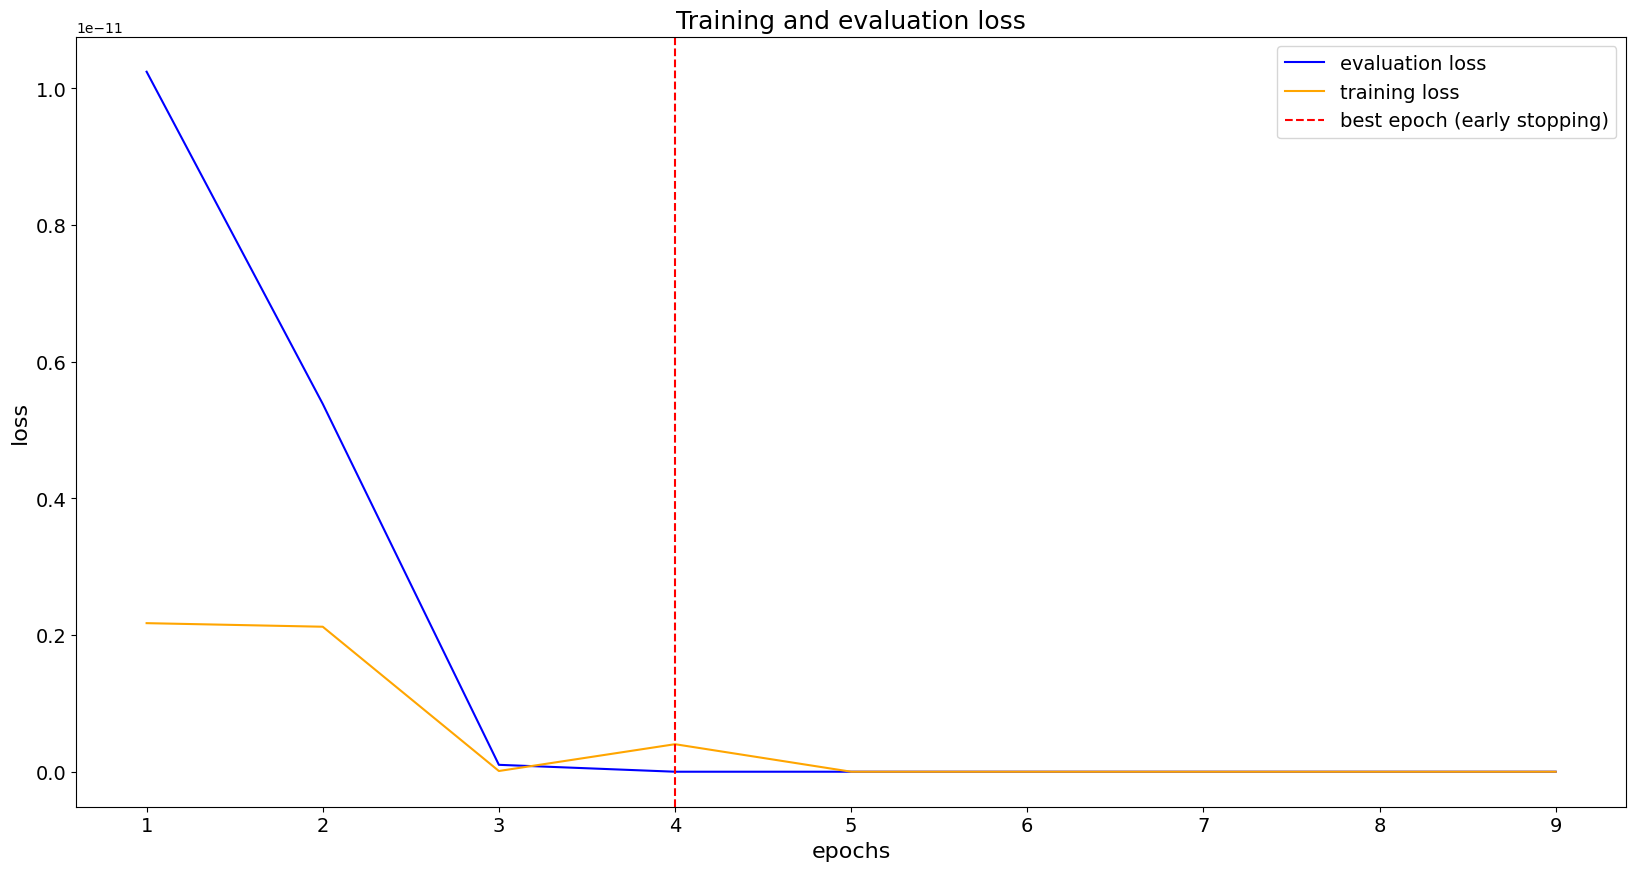

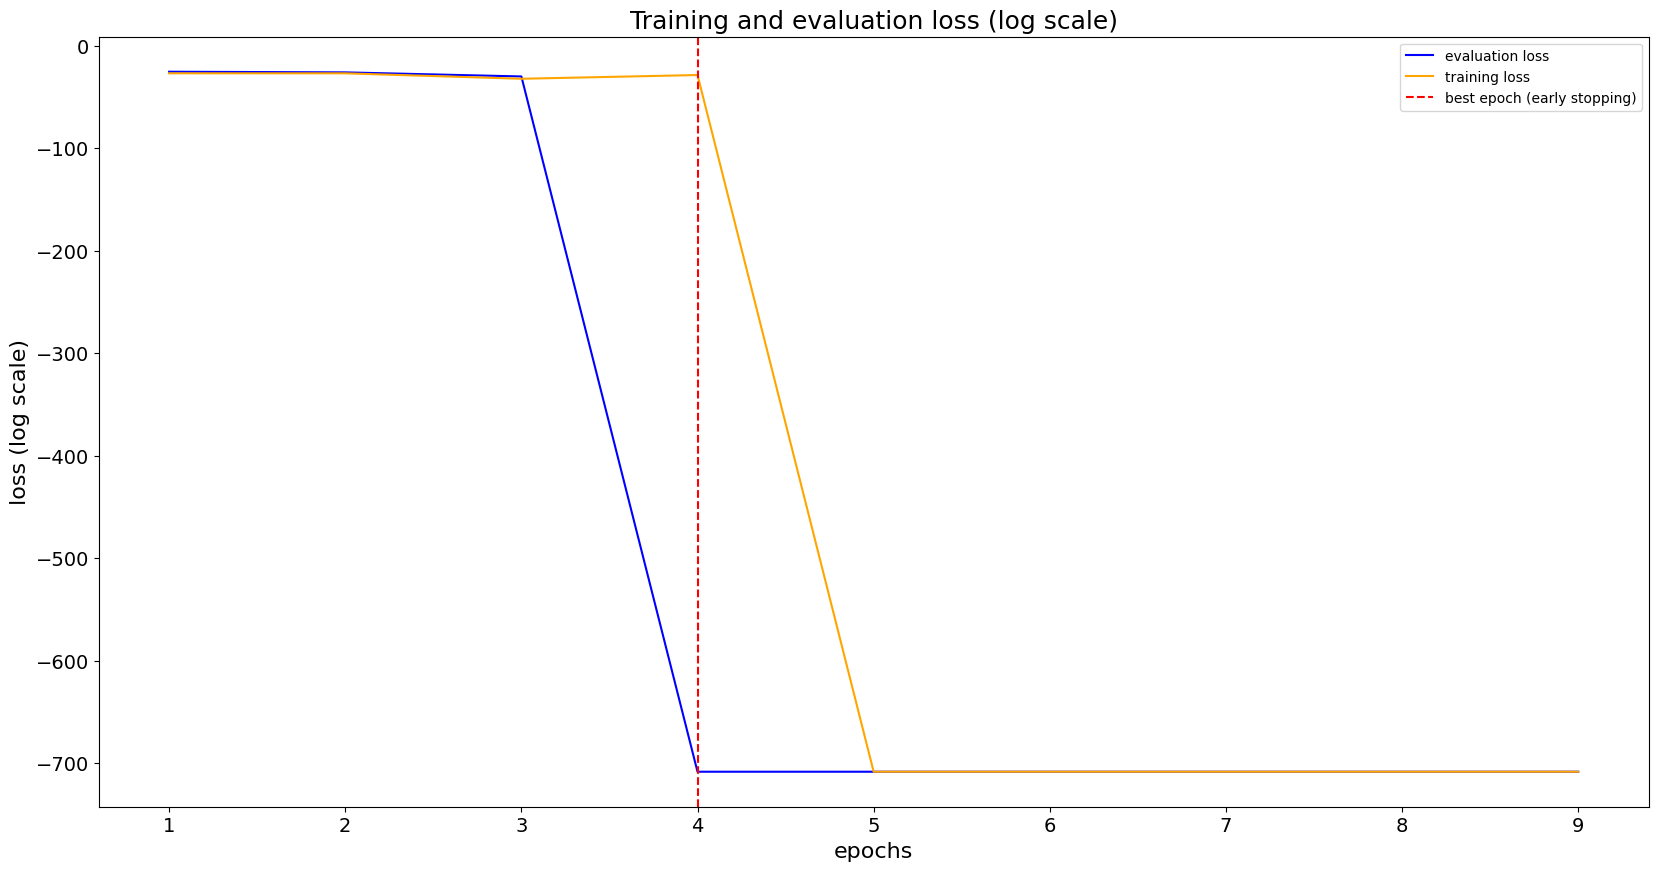

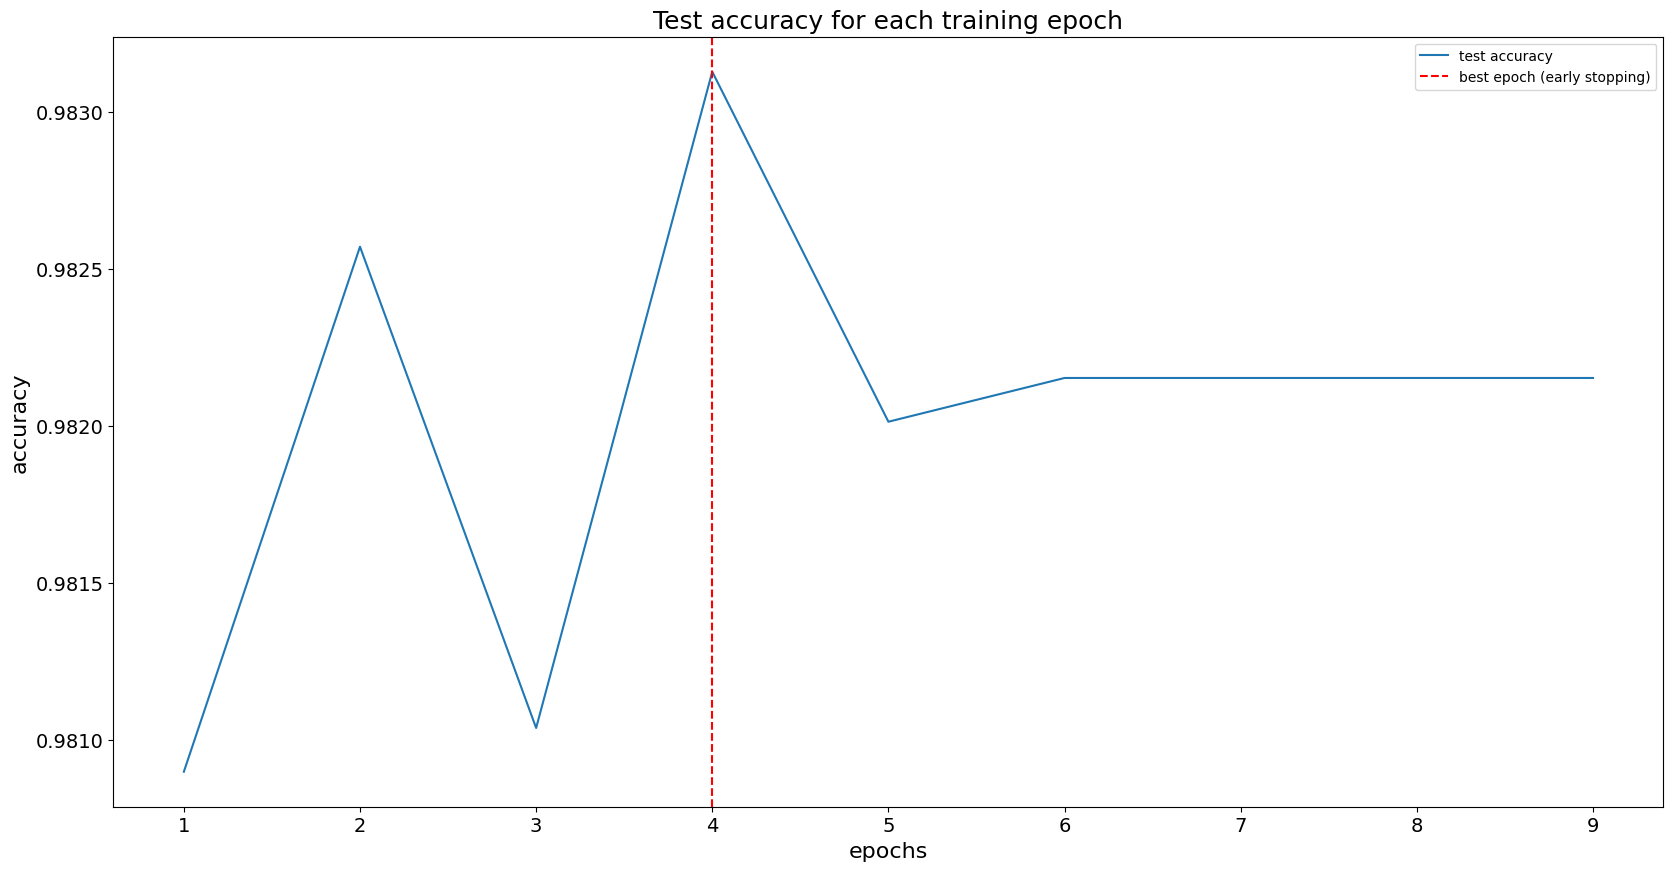

In [10]:
best_model.plot_metrics()

# Worst Model

In [11]:
all_results.sort_values(by=['test_accuracies'], ascending=True).head(10)

,test_id,architecture_id,optimizer,lr,batch_size,patience,data_augmentation_perc,test_accuracies,test_times,train_times
1,1,0,AMSGrad,0.0005,32,5,0.25,0.903514,0.058538,64.383646
0,0,0,AMSGrad,0.0005,32,5,0.00,0.909927,0.057194,52.636681
2,2,0,AMSGrad,0.0005,32,5,0.50,0.915505,0.057991,35.618378
3,3,0,AMSGrad,0.0005,32,5,0.75,0.928751,0.058305,87.831853
5,5,0,AMSGrad,0.0005,32,10,0.25,0.933491,0.057468,65.432281
21,21,0,AMSGrad,0.0005,64,10,0.25,0.939208,0.039112,4.539042
46,46,0,AMSGrad,0.0005,128,20,0.50,0.940602,0.032367,7.132962
14,14,0,AMSGrad,0.0005,32,20,0.50,0.941299,0.057308,18.959954
51,51,0,AMSGrad,0.0005,256,5,0.75,0.943391,0.029737,34.857853
27,27,0,AMSGrad,0.0005,64,15,0.75,0.944367,0.038771,50.658747


Loaded model: LeNet5_test_1


Architecture:
name: LeNet5
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 6, 14, 14]           --
|    └─Conv2d: 2-1                       [-1, 6, 28, 28]           156
|    └─BatchNorm2d: 2-2                  [-1, 6, 28, 28]           12
|    └─ReLU: 2-3                         [-1, 6, 28, 28]           --
|    └─MaxPool2d: 2-4                    [-1, 6, 14, 14]           --
├─Sequential: 1-2                        [-1, 16, 5, 5]            --
|    └─Conv2d: 2-5                       [-1, 16, 10, 10]          2,416
|    └─BatchNorm2d: 2-6                  [-1, 16, 10, 10]          32
|    └─ReLU: 2-7                         [-1, 16, 10, 10]          --
|    └─MaxPool2d: 2-8                    [-1, 16, 5, 5]            --
├─Linear: 1-3                            [-1, 120]                 48,120
├─ReLU: 1-4                              [-1, 120]                 --
├─Linear: 1-5       

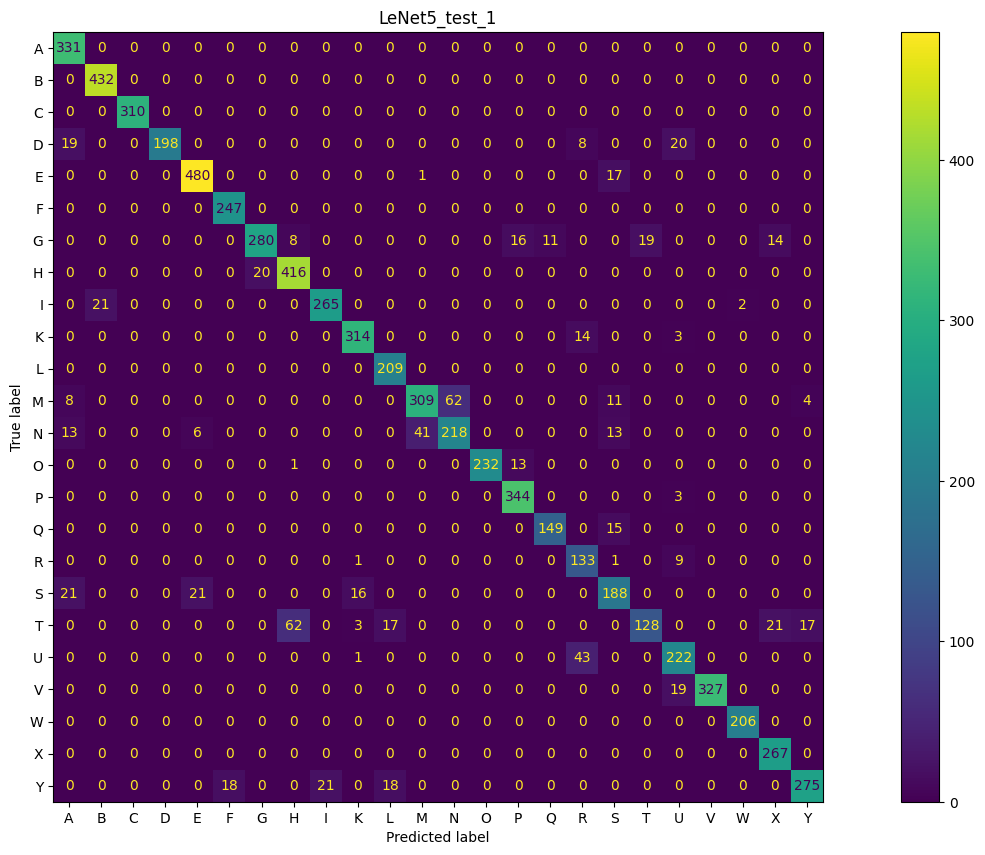

0.9035136642498606


In [12]:
worst_model = NeuralNetwork.load_NN(all_results.iloc[1], classifiers_dict, torch.device("cuda"), (32, 32))
worst_model.plot_confusion_matrix()

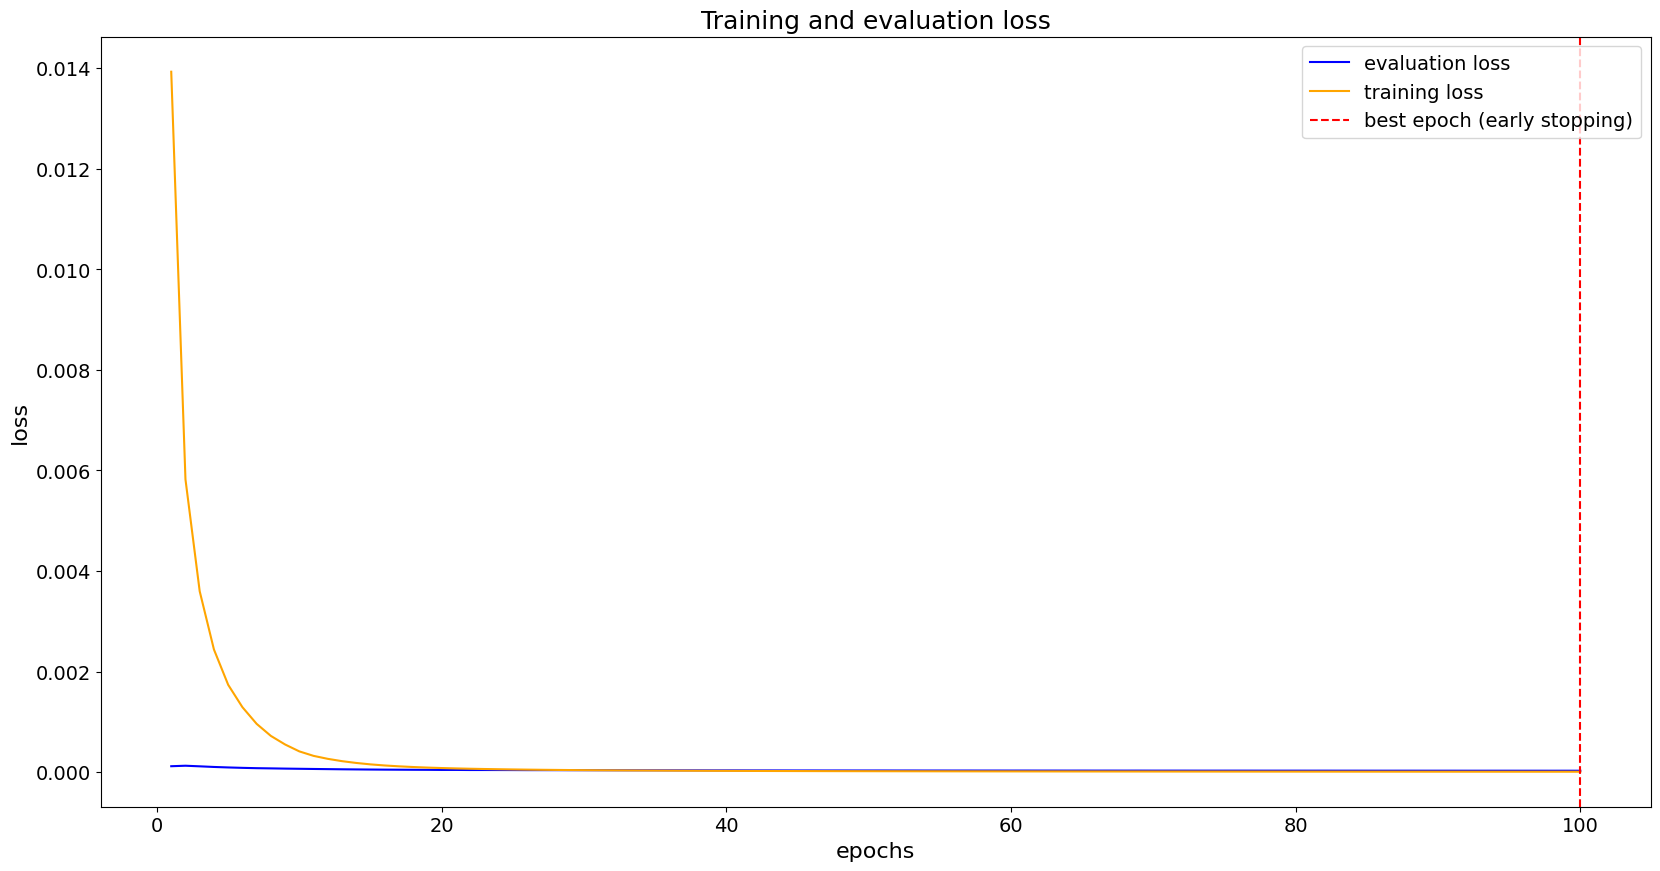

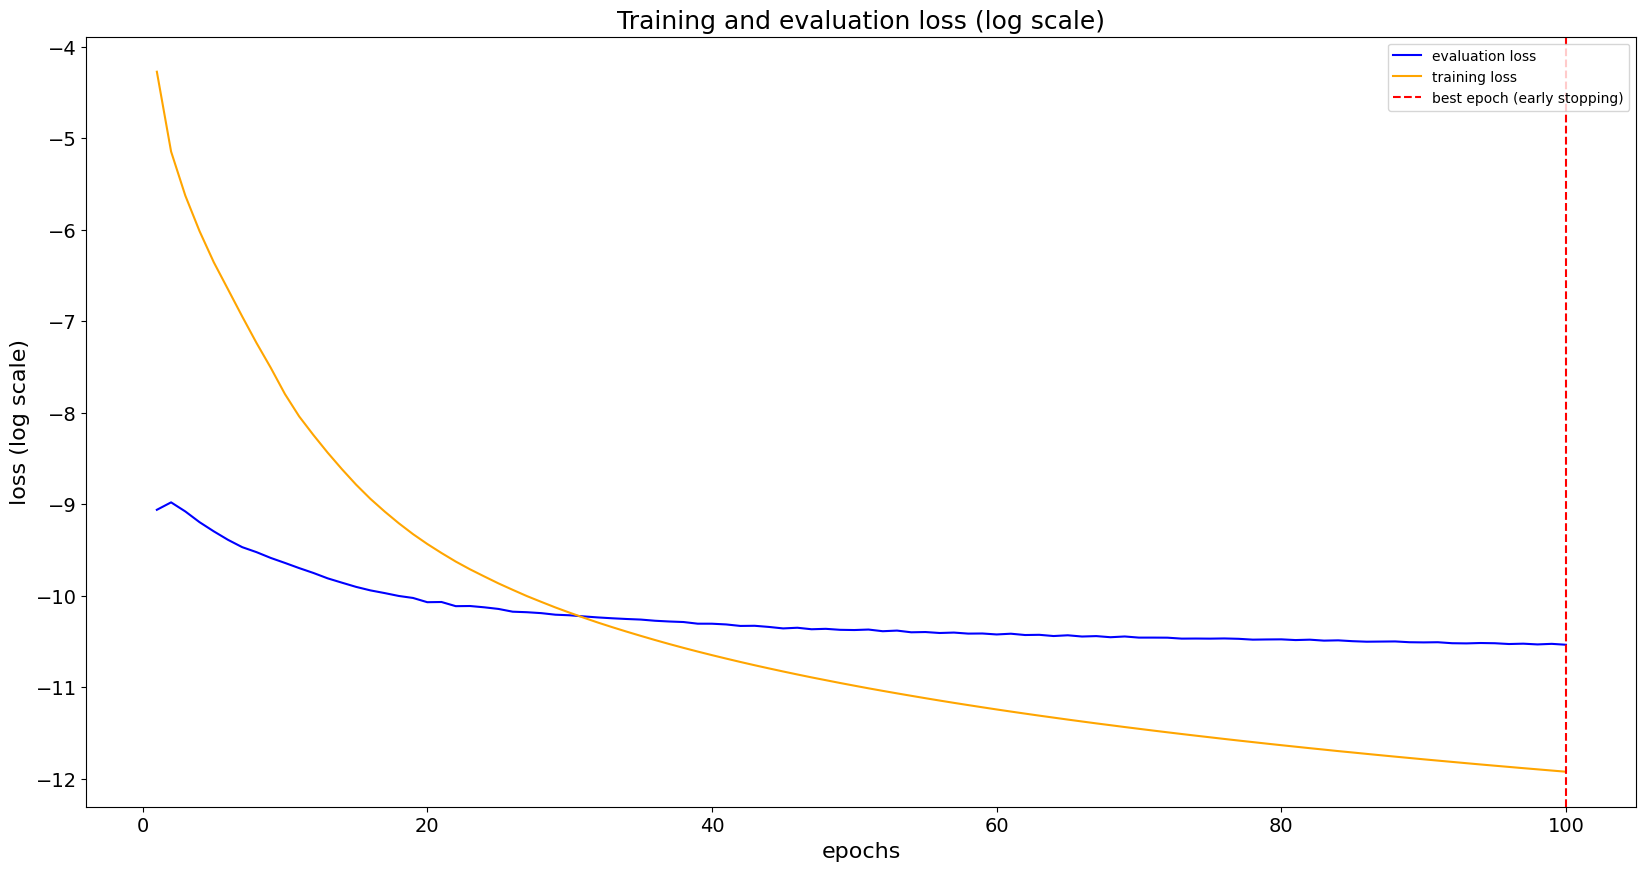

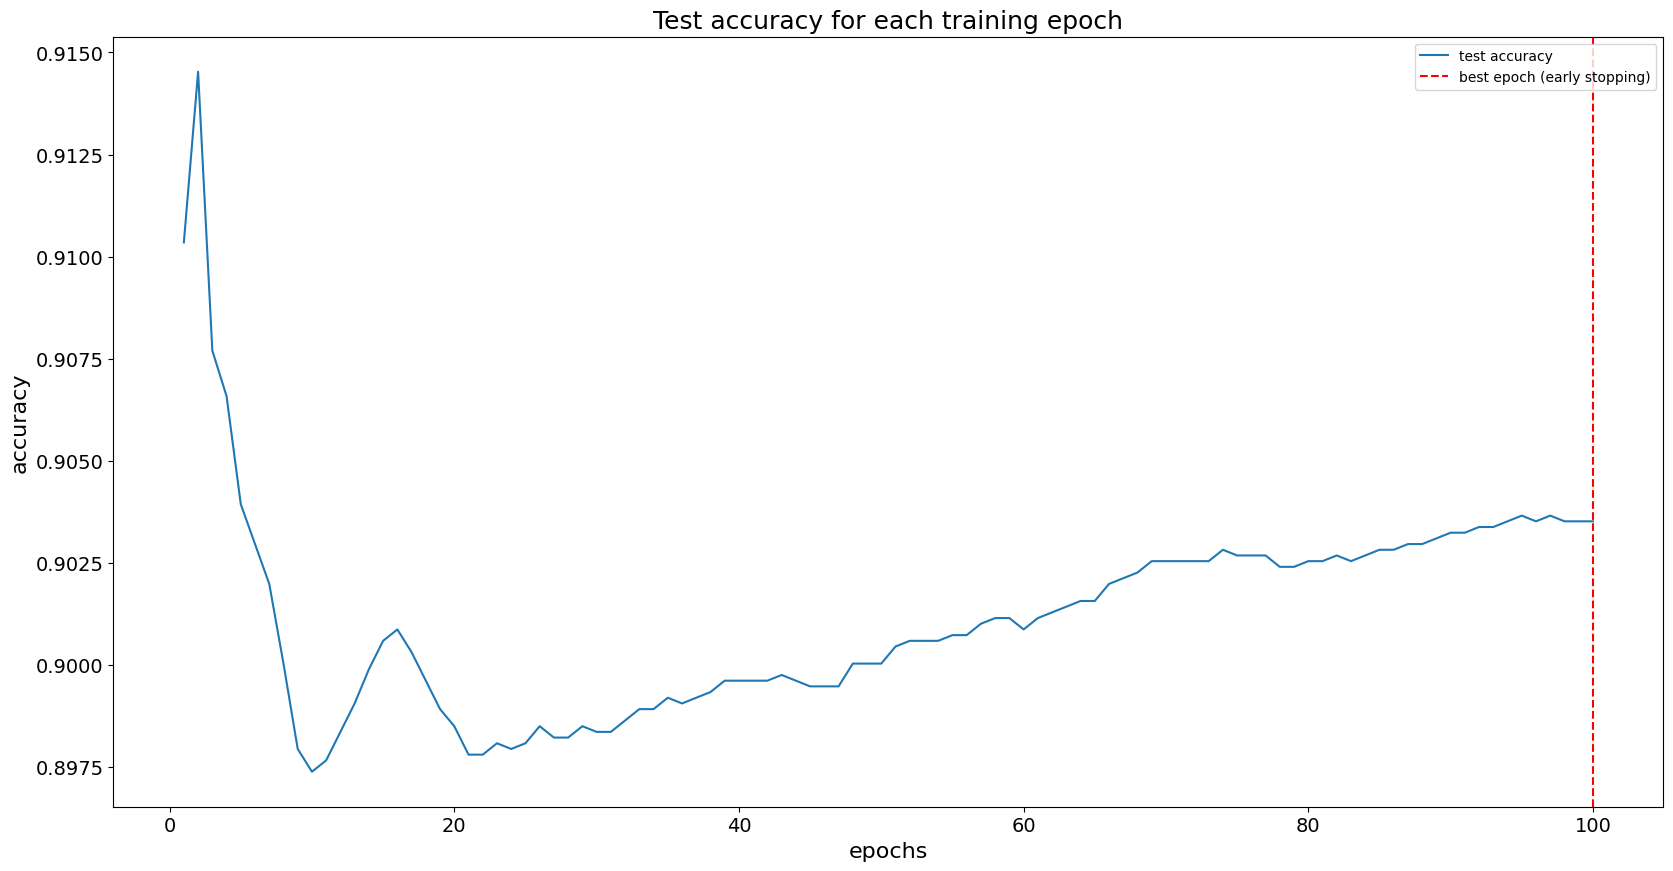

In [13]:
worst_model.plot_metrics()

# Use the model

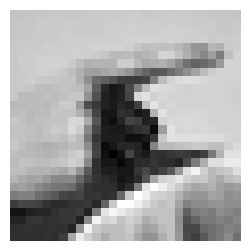

True label: G


{'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'E': 0.0,
 'F': 0.0,
 'G': 1.0,
 'H': 0.0,
 'I': 0.0,
 'K': 0.0,
 'L': 0.0,
 'M': 0.0,
 'N': 0.0,
 'O': 0.0,
 'P': 0.0,
 'Q': 0.0,
 'R': 0.0,
 'S': 0.0,
 'T': 0.0,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 0.0,
 'Y': 0.0}

In [14]:
image, response = sample_image(index = 0)
best_model.predict(image)